# UK Property Image Classification
### EDA model 2

---

#### Data:
Loading more images (150 each class, from 100) to build a second model
Revised data set as of 13 Feb 2021 - 12 changes

#### Model:
Convoluted Neural Nets

#### Initial model results:
The model validation accuracy is 80%, compared to a base case of 50%. 200 images are used in the initial model training

#### Training model with more images:
Validation accuracy score is 78%, similar to that of a smaller set of images. Satisfactory results given that there is more confusion with more interior images

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from math import ceil
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from skimage import io
from skimage import color
from skimage.transform import rescale, resize, downscale_local_mean

import pickle

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
# For reproducibility
np.random.seed(42)

In [4]:
# function to load folder into arrays and  then it returns that same array

def load_files(path):
    # Put files into lists and return them as one list of size 4
    image_files = os.listdir(path)
    image_files = [path + x for x in image_files]
    return image_files

In [5]:
# feeding images into numpy ndarray

def load_array(image_files, min_size):
    X = np.array([])
    for file in image_files:
        try:
            img = io.imread(file)
            img_resized = resize(img, (min_size,min_size), anti_aliasing=True)
            if X.shape[0] == 0:
                X = np.array([img_resized])
            else:
                X = np.append(X, [img_resized], axis = 0)
        
        except:
            print("image error: ", file)
    return X



#### Load the training data - old buildings

In [6]:
# Photos of old or period buildings

image_path = "../images/old_samples/"
image_files = load_files(image_path)

# second batch of old buildings - 150 images of interior
image_path2 = "../images/old_interior/"
image_files2 = load_files(image_path2)

# concatenating 2 lists
image_files = image_files + image_files2

# set min_size = 400
min_size = 400

print(f"number of image_files = {len(image_files)}")
print(f"min_size = {min_size}")

number of image_files = 251
min_size = 400


In [7]:
# look through the resolution of image files
df_file_info = pd.DataFrame(image_files)
df_file_info.columns = ["image_link"]
print(f"df_file_info = {df_file_info.head(5)}")

df_file_info =                                         image_link
0  ../images/old_samples/photo-14610337-AfvlL7.jpg
1  ../images/old_samples/photo-14613473-oJlAGk.jpg
2  ../images/old_samples/photo-14613600-uzDqQq.jpg
3  ../images/old_samples/photo-14614603-V4bv1O.jpg
4  ../images/old_samples/photo-14615502-8O2X6l.jpg


In [8]:
X_old = load_array(image_files, min_size)

# y value is zero for old buildings
y_old = np.zeros((len(image_files),1))

print(f"X_old shape = {X_old.shape}")
print(f"y_old shape = {y_old.shape}")

c:\python37\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


X_old shape = (251, 400, 400, 3)
y_old shape = (251, 1)


In [9]:
df_y_old = pd.DataFrame(y_old, columns=["label"])
df_y_old["image_link"] = df_file_info["image_link"]
print(df_y_old.shape)

(251, 2)


In [10]:
# Photos of modern buildings

image_path = "../images/modern_samples/"
image_files = load_files(image_path)

# second batch of old buildings - 150 images of interior
image_path2 = "../images/modern_exterior/"
image_files2 = load_files(image_path2)

# concatenating 2 lists
image_files = image_files + image_files2

# set min_size = 400
min_size = 400

print(f"number of image_files = {len(image_files)}")
print(f"min_size = {min_size}")

number of image_files = 240
min_size = 400


In [11]:
# look through the resolution of image files
df_file_info = pd.DataFrame(image_files)
df_file_info.columns = ["image_link"]
print(f"df_file_info = {df_file_info.head(5)}")

df_file_info =                                           image_link
0  ../images/modern_samples/photo-14607856-PBTR2E...
1  ../images/modern_samples/photo-14607975-aH71tJ...
2  ../images/modern_samples/photo-14608672-cQhyQn...
3  ../images/modern_samples/photo-14608758-AyTNmO...
4  ../images/modern_samples/photo-14608761-kbFlFq...


In [12]:
X_modern = load_array(image_files, min_size)

# y value is one for modern buildings
y_modern = np.ones((len(image_files),1))

print(f"X_modern shape = {X_modern.shape}")
print(f"y_modern shape = {y_modern.shape}")

X_modern shape = (240, 400, 400, 3)
y_modern shape = (240, 1)


In [13]:
df_y_modern = pd.DataFrame(y_modern, columns=["label"])
df_y_modern["image_link"] = df_file_info["image_link"]
print(df_y_modern.shape)

(240, 2)


In [14]:
X = np.append(X_old, X_modern, axis = 0)
X.shape

(491, 400, 400, 3)

In [15]:
df_y = pd.concat([df_y_old, df_y_modern])
df_y.reset_index(drop=True, inplace=True)
df_y["id"] = df_y.index
print(df_y.shape)
df_y.tail(10)

(491, 3)


,label,image_link,id
481,1.0,../images/modern_exterior/photo-14748791-NXoBE...,481
482,1.0,../images/modern_exterior/photo-14749036-KDpxC...,482
483,1.0,../images/modern_exterior/photo-14749133-sPopz...,483
484,1.0,../images/modern_exterior/photo-14749274-JCFg9...,484
485,1.0,../images/modern_exterior/photo-14749594-D3S3G...,485
486,1.0,../images/modern_exterior/photo-14749754-aMjBv...,486
487,1.0,../images/modern_exterior/photo-14749941-ylAYu...,487
488,1.0,../images/modern_exterior/photo-14750095-gpCbn...,488
489,1.0,../images/modern_exterior/photo-14750097-vC2kr...,489
490,1.0,../images/modern_exterior/photo-14750142-ZuvZh...,490


#### Train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, stratify=df_y["label"])
print(y_train.shape)

(368, 3)


In [17]:
# Baseline accuracy - 50%
y_train['label'].value_counts()

0.0    188
1.0    180
Name: label, dtype: int64

In [18]:
y_test.shape

(123, 3)

In [19]:
y_test['id'][:10]

332    332
379    379
403    403
203    203
310    310
187    187
88      88
54      54
74      74
103    103
Name: id, dtype: int64

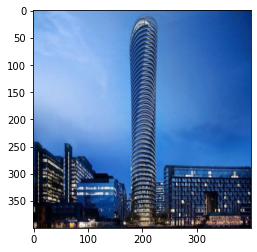

In [20]:
plt.imshow(X_train[0])

#### Standard Scaler

In [21]:
X_train_flat = X_train.flatten().reshape(-1,1)
X_train_flat.shape

(176640000, 1)

In [22]:
X_test_flat = X_test.flatten().reshape(-1,1)
X_test_flat.shape

(59040000, 1)

In [23]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train_flat).reshape(X_train.shape)
X_test_ss = ss.transform(X_test_flat).reshape(X_test.shape)

### Second run of model

In [24]:
# Instantiate a CNN.
cnn_model = Sequential()

In [25]:
# Add a convolutional layer.

cnn_model.add(Conv2D(filters = 6,            # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(min_size,min_size,3))) # shape of input (image)

In [26]:
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling
cnn_model.add(Conv2D(16,
                     kernel_size=3,
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))
# Add a final layer with 2 neurons.
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile model
cnn_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [27]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 16)      880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               19669120  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [28]:
# Fit model on training data
history = cnn_model.fit(X_train_ss,
                        y_train['label'],
                        batch_size=64,
                        validation_data=(X_test_ss, y_test['label']),
                        epochs=30,
                        verbose=1)

Epoch 1/30
6/6 [==============================] - 29s 3s/step - loss: 12.5635 - accuracy: 0.4984 - val_loss: 4.9654 - val_accuracy: 0.5122
Epoch 2/30
6/6 [==============================] - 16s 3s/step - loss: 2.9431 - accuracy: 0.4877 - val_loss: 0.6895 - val_accuracy: 0.5041
Epoch 3/30
6/6 [==============================] - 14s 2s/step - loss: 0.6726 - accuracy: 0.5759 - val_loss: 0.8176 - val_accuracy: 0.5528
Epoch 4/30
6/6 [==============================] - 14s 2s/step - loss: 0.7689 - accuracy: 0.5383 - val_loss: 0.6782 - val_accuracy: 0.5528
Epoch 5/30
6/6 [==============================] - 14s 2s/step - loss: 0.6516 - accuracy: 0.6348 - val_loss: 0.6633 - val_accuracy: 0.6341
Epoch 6/30
6/6 [==============================] - 14s 2s/step - loss: 0.6103 - accuracy: 0.6342 - val_loss: 0.5956 - val_accuracy: 0.7073
Epoch 7/30
6/6 [==============================] - 14s 2s/step - loss: 0.5100 - accuracy: 0.7562 - val_loss: 0.5663 - val_accuracy: 0.6992
Epoch 8/30
6/6 [=================

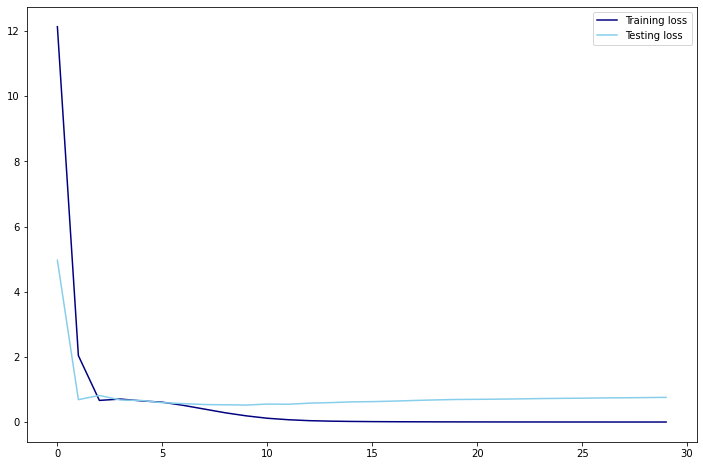

In [29]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

#### List out the images of misclassification - test images

In [30]:
y_test.head(10)

,label,image_link,id
332,1.0,../images/modern_samples/photo-14629729-2OaezP...,332
379,1.0,../images/modern_exterior/photo-14727621-X3kCW...,379
403,1.0,../images/modern_exterior/photo-14730218-kOtCv...,403
203,0.0,../images/old_interior/photo-14639167-c1AMBG.jpg,203
310,1.0,../images/modern_samples/photo-14622441-kgkqz7...,310
187,0.0,../images/old_interior/photo-14636247-RC712F.jpg,187
88,0.0,../images/old_samples/photo-14716402-cHNRsN.jpg,88
54,0.0,../images/old_samples/photo-14673799-fkPmpt.jpg,54
74,0.0,../images/old_samples/photo-14705061-xtKQl8.jpg,74
103,0.0,../images/old_interior/photo-14609311-tUUOGy.jpg,103


In [31]:
y_pred = cnn_model.predict(X_test_ss)


In [32]:
y_pred.shape

(123, 1)

In [33]:
y_test['pred'] = y_pred.round()
y_test['prob'] = y_pred.round(3)
y_test.head(10)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,image_link,id,pred,prob
332,1.0,../images/modern_samples/photo-14629729-2OaezP...,332,0.0,0.222
379,1.0,../images/modern_exterior/photo-14727621-X3kCW...,379,1.0,0.985
403,1.0,../images/modern_exterior/photo-14730218-kOtCv...,403,1.0,0.966
203,0.0,../images/old_interior/photo-14639167-c1AMBG.jpg,203,0.0,0.496
310,1.0,../images/modern_samples/photo-14622441-kgkqz7...,310,0.0,0.002
187,0.0,../images/old_interior/photo-14636247-RC712F.jpg,187,0.0,0.001
88,0.0,../images/old_samples/photo-14716402-cHNRsN.jpg,88,0.0,0.009
54,0.0,../images/old_samples/photo-14673799-fkPmpt.jpg,54,1.0,0.999
74,0.0,../images/old_samples/photo-14705061-xtKQl8.jpg,74,0.0,0.001
103,0.0,../images/old_interior/photo-14609311-tUUOGy.jpg,103,1.0,0.919


In [34]:
# count the number of photos misclassified in y_test
y_test_misclassified = y_test[["image_link", "label", "pred", "prob"]][y_test["label"] != y_test["pred"]]

print(f"total number in y_test: {y_test.shape[0]}")
print(f"misclassified in y_test: {y_test_misclassified.shape[0]}")
y_test_misclassified.head()



total number in y_test: 123
misclassified in y_test: 27


,image_link,label,pred,prob
332,../images/modern_samples/photo-14629729-2OaezP...,1.0,0.0,0.222
310,../images/modern_samples/photo-14622441-kgkqz7...,1.0,0.0,0.002
54,../images/old_samples/photo-14673799-fkPmpt.jpg,0.0,1.0,0.999
103,../images/old_interior/photo-14609311-tUUOGy.jpg,0.0,1.0,0.919
472,../images/modern_exterior/photo-14747250-UcI22...,1.0,0.0,0.077


20


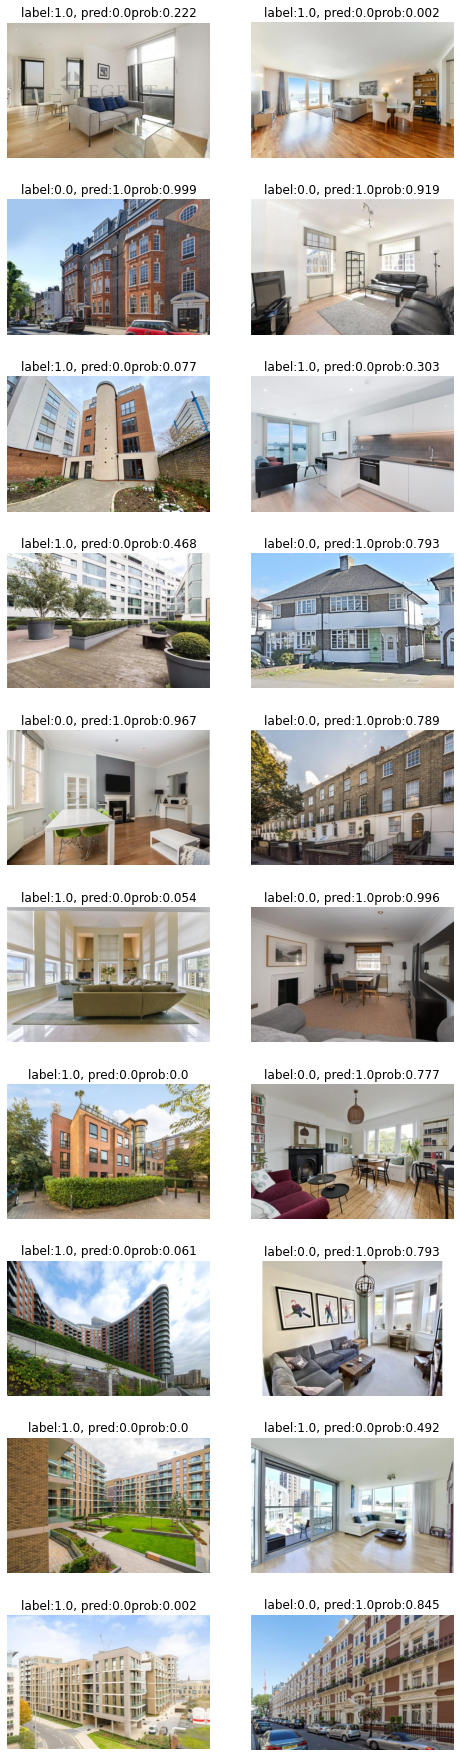

In [35]:
# show the first 20 photos misclassified in y_test
display_no = min(20, y_test_misclassified.shape[0])

fig, ax = plt.subplots(ceil(display_no/2), 2, figsize=(8,32))
j=0
for i in y_test_misclassified.index[:display_no]:
    row = j//2
    col = j%2
    image_link = y_test_misclassified.loc[i, "image_link"]
    ax[row][col].imshow(io.imread(image_link))
    ax[row][col].set_title("label:" + str(y_test_misclassified.loc[i, "label"]) + ", pred:" + str(y_test_misclassified.loc[i, "pred"]) + "prob:"  + str(y_test_misclassified.loc[i, "prob"]))
    ax[row][col].axis('off')
    j += 1

print(j)

### Saving the model

In [36]:
model_tag = "model2a"

In [37]:
# save the scaler
pickle.dump(ss, open('../models/' + model_tag + '/scaler.pkl', 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: '../models/model2a/scaler.pkl'

In [ ]:
# Save the model
model = cnn_model

path = '../models/' + model_tag + '/'
model.save(path)
